In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Indarung VI_Clean.csv")
df

,eqp1,eqp2,no req,wbs,item desc,qty,net weight,man hour
0,421,kr405,443199,p4-1302-421-da-m,clean out hole o,8,"80,0","57,0"
1,421,cn220,443727,p4-1302-421-da-m,cyclone preheater clean out hole o,1,"13,0","17,9"
2,421,cn220,443727,p4-1302-421-da-m,cyclone preheater clean out hole o,1,"13,0","17,9"
3,421,cn110,443727,p4-1302-421-da-m,clean out hole for preheater distribution box ...,1,"13,0","19,2"
4,421,cn210,443727,p4-1302-421-da-m,clean out hole for preheater distribution box ...,1,"13,0","19,2"
...,...,...,...,...,...,...,...,...
1225,511,bi200,460653,p4-1302-541-ea-m,bin limestone,1,"12.217,0","2.440,2"
1226,511,bi300,460667,p4-1302-541-ea-m,bin gypsum,1,"14.098,0","2.561,7"
1227,511,bi400,460669,p4-1302-541-ea-m,bin pozzolan,1,"17.943,4","1.919,6"
1228,465,bi550,458425,p4-1302-461-di-m,coal meal bin id,1,"29.408,3","4.210,9"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   eqp1         1210 non-null   object
 1   eqp2         1209 non-null   object
 2   no req       1149 non-null   object
 3   wbs          1191 non-null   object
 4   item desc    1230 non-null   object
 5   qty          1230 non-null   int64 
 6   net weight   1229 non-null   object
 7   man hour     1230 non-null   object
dtypes: int64(1), object(7)
memory usage: 77.0+ KB


In [ ]:
!pip install webcolors
!pip install fuzzywuzzy
!pip install PySastrawi

     |████████████████████████████████| 210 kB 12.0 MB/s 


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

from gensim.parsing.preprocessing import remove_stopwords
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import webcolors

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
item_desc1 = df["item desc"]
item_desc1

0                                        clean out hole o
1                      cyclone preheater clean out hole o
2                      cyclone preheater clean out hole o
3       clean out hole for preheater distribution box ...
4       clean out hole for preheater distribution box ...
                              ...                        
1225                                        bin limestone
1226                                           bin gypsum
1227                                         bin pozzolan
1228                                     coal meal bin id
1229                                     coal meal bin id
Name: item desc, Length: 1230, dtype: object

In [ ]:
item_desc2 = [remove_stopwords(x).
              translate(str.maketrans('','',string.punctuation)).
              translate(str.maketrans('','',string.digits))
              for x in item_desc1]

item_desc2

['clean hole o',
 'cyclone preheater clean hole o',
 'cyclone preheater clean hole o',
 'clean hole preheater distribution box raw feed distribution stage string',
 'clean hole preheater distribution box raw feed distribution stage string',
 'ladder',
 'fabricated',
 'st stage ladder',
 'cyclone preheater blow pipe air blaster',
 'sluice flap cypl preheater ht',
 'set yokos',
 'cyclone preheater distribution box deg preheater',
 'test gauge suspension iron',
 'test gauge suspension iron',
 'sluice flap stage string sluice flap',
 'sluice flap stage string sluice flap',
 'sluice flap stage string d',
 'test gauge suspension iron',
 'test gauge suspension iron',
 'sluice flap stage string',
 'test gauge suspension iron',
 'test gauge suspension iron',
 'raw feed distribution stage string spreader plate',
 'test gauge suspension iron',
 'test gauge suspension iron',
 'raw feed distribution stage string spreader plate',
 'port details',
 'bracket jacking',
 'test gauge suspension iron',
 '

In [ ]:
def stemSentence(sentence):
  porter = PorterStemmer()
  token_words = word_tokenize(sentence)
  stem_sentence = [porter.stem(word) for word in token_words]
  return ' '.join(stem_sentence)

item_desc3 = pd.Series([stemSentence(x) for x in item_desc2])
item_desc3

0                                            clean hole o
1                             cyclon preheat clean hole o
2                             cyclon preheat clean hole o
3       clean hole preheat distribut box raw feed dist...
4       clean hole preheat distribut box raw feed dist...
                              ...                        
1225                                         bin limeston
1226                                           bin gypsum
1227                                         bin pozzolan
1228                                     coal meal bin id
1229                                     coal meal bin id
Length: 1230, dtype: object

In [ ]:
vectorizer_cv = CountVectorizer(analyzer = 'word')
X_cv = vectorizer_cv.fit_transform(item_desc3)
X_cv

<1230x332 sparse matrix of type '<class 'numpy.int64'>'
	with 3429 stored elements in Compressed Sparse Row format>

In [ ]:
matrix = pd.concat([item_desc3,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())], axis = 1)
matrix[[0, "clean", "hole", "plate"]]

,0,clean,hole,plate
0,clean hole o,1,1,0
1,cyclon preheat clean hole o,1,1,0
2,cyclon preheat clean hole o,1,1,0
3,clean hole preheat distribut box raw feed dist...,1,1,0
4,clean hole preheat distribut box raw feed dist...,1,1,0
...,...,...,...,...
1225,bin limeston,0,0,0
1226,bin gypsum,0,0,0
1227,bin pozzolan,0,0,0
1228,coal meal bin id,0,0,0


In [ ]:
vectorizer_wtf = TfidfVectorizer(analyzer = 'word')
X_wtf = vectorizer_wtf.fit_transform(item_desc3)
X_wtf

<1230x332 sparse matrix of type '<class 'numpy.float64'>'
	with 3429 stored elements in Compressed Sparse Row format>

In [ ]:
matrix = pd.concat([item_desc3,pd.DataFrame(X_wtf.toarray(),columns=vectorizer_wtf.get_feature_names_out())], axis = 1)
matrix[[0, "clean", "hole", "plate"]]

,0,clean,hole,plate
0,clean hole o,0.649552,0.760317,0.0
1,cyclon preheat clean hole o,0.498074,0.583007,0.0
2,cyclon preheat clean hole o,0.498074,0.583007,0.0
3,clean hole preheat distribut box raw feed dist...,0.247987,0.290275,0.0
4,clean hole preheat distribut box raw feed dist...,0.247987,0.290275,0.0
...,...,...,...,...
1225,bin limeston,0.000000,0.000000,0.0
1226,bin gypsum,0.000000,0.000000,0.0
1227,bin pozzolan,0.000000,0.000000,0.0
1228,coal meal bin id,0.000000,0.000000,0.0


In [ ]:
vectorizer_ntf = TfidfVectorizer(analyzer = 'word', ngram_range=(1, 2))
X_ntf = vectorizer_ntf.fit_transform(item_desc3)
X_ntf

<1230x910 sparse matrix of type '<class 'numpy.float64'>'
	with 5697 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


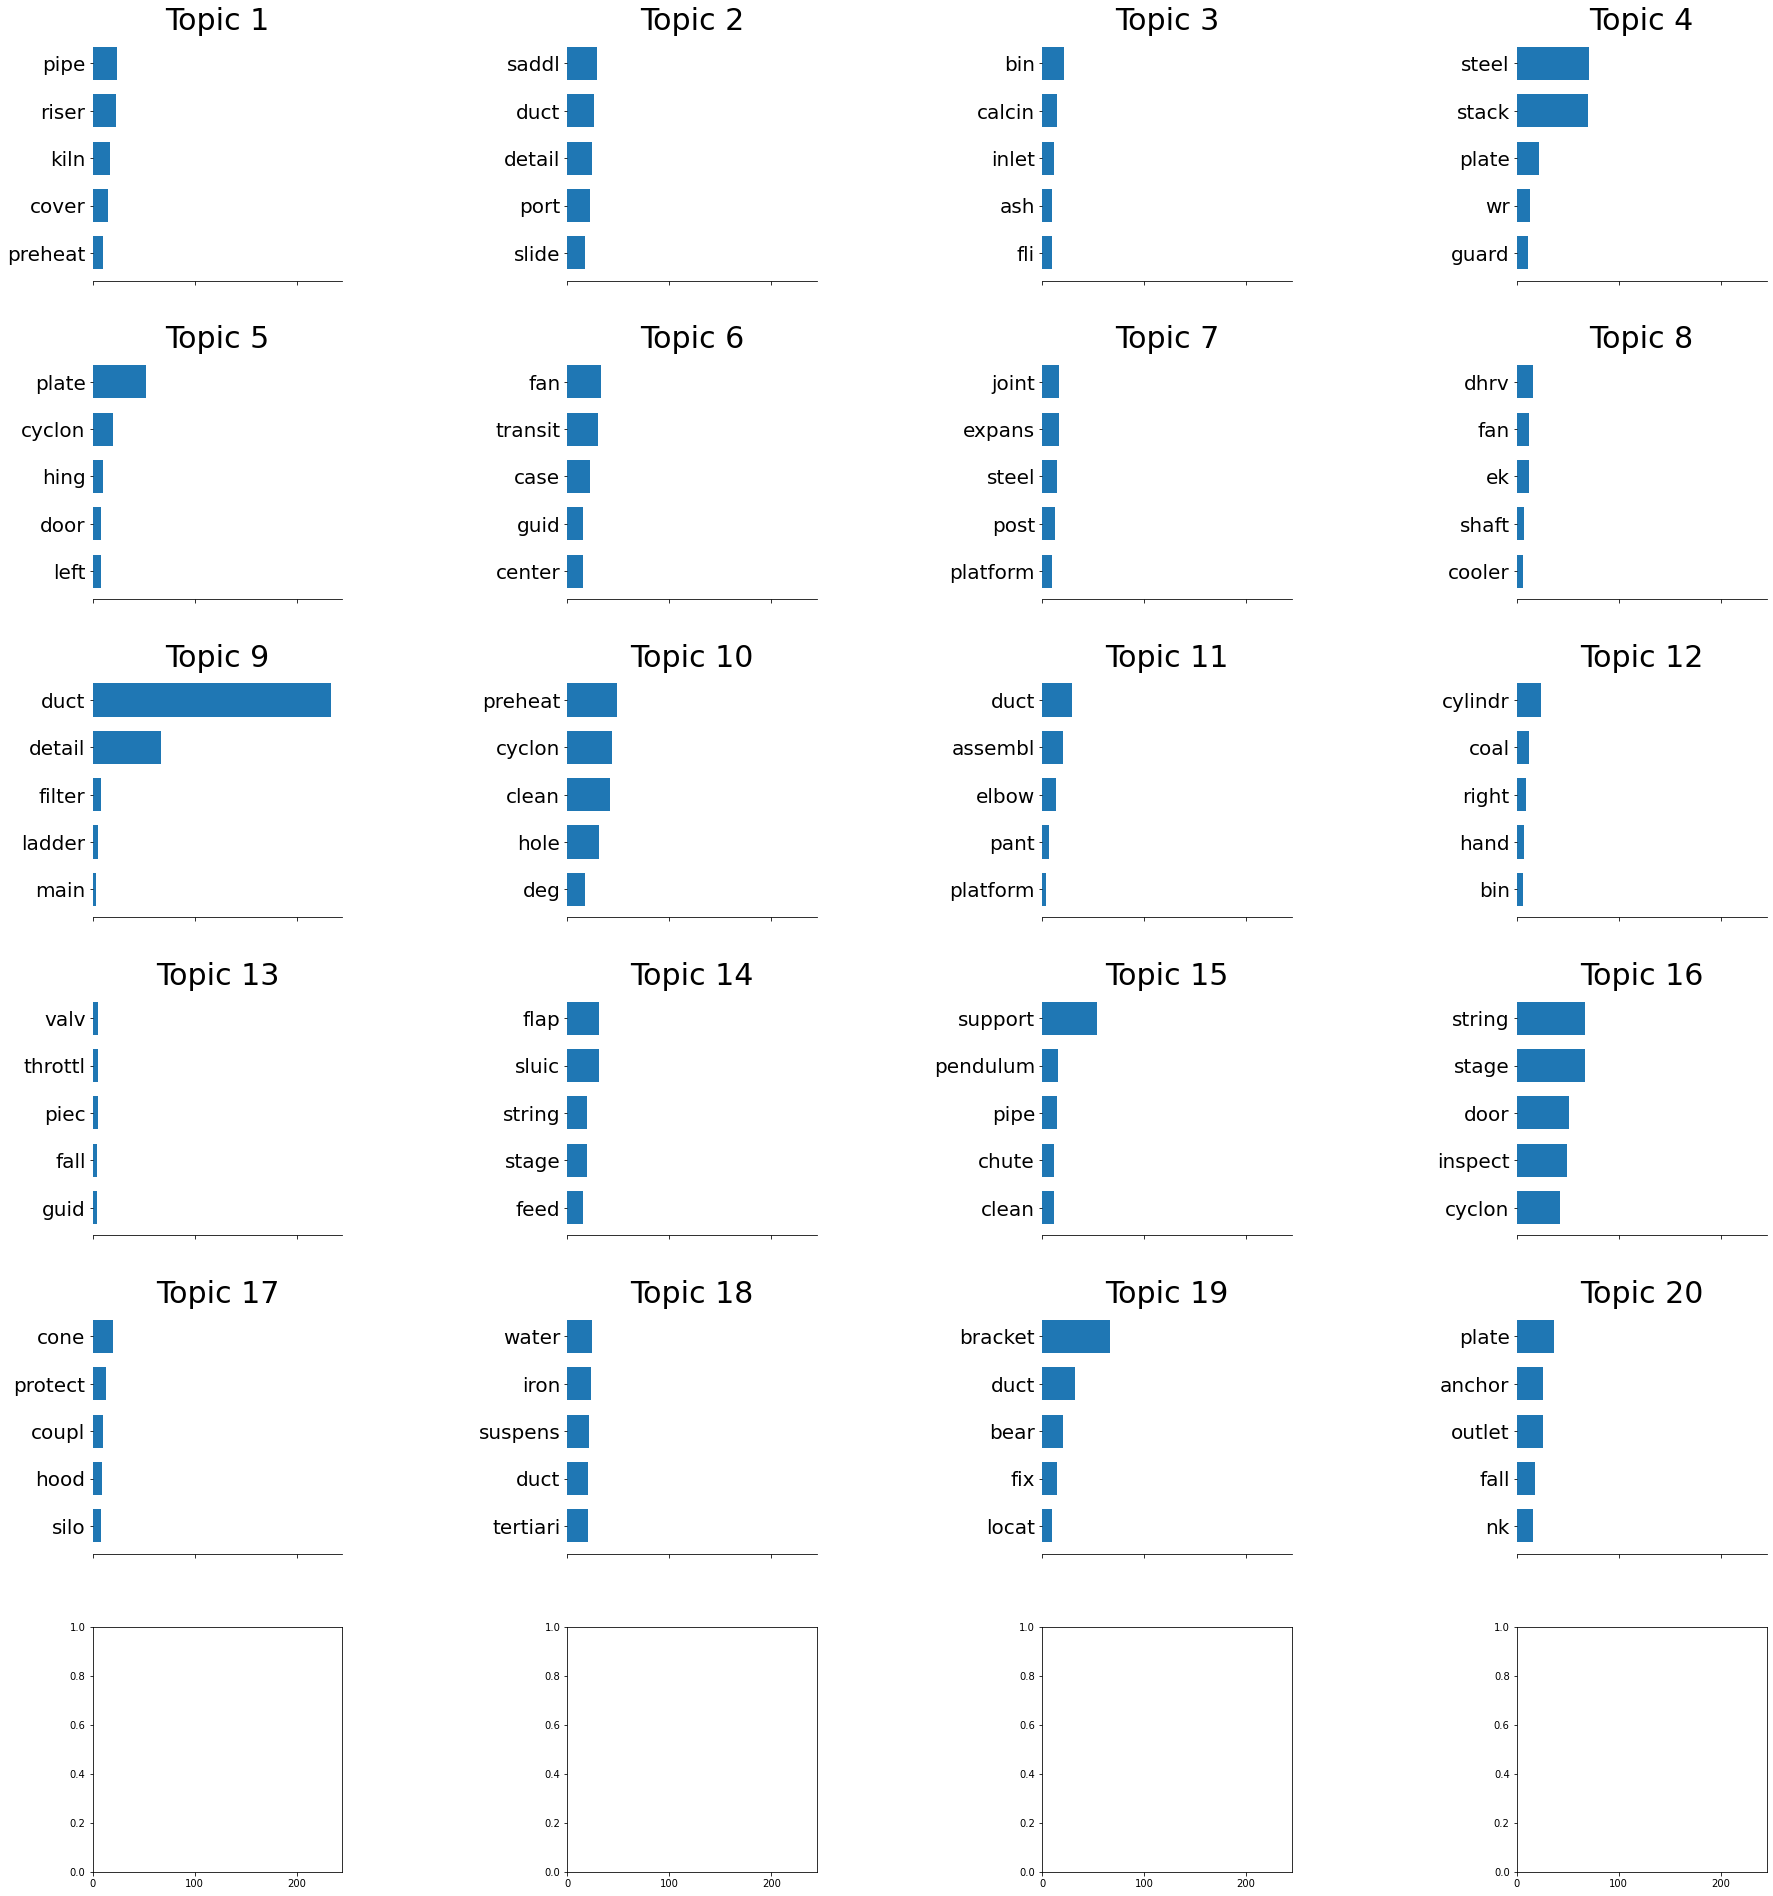

In [ ]:
lda = LatentDirichletAllocation(n_components=20, learning_decay=0.9)
X_lda = lda.fit(X_cv)


def plot_top_words(model, feature_names, n_top_words, title):
  fig, axes = plt.subplots(6, 4, figsize=(30, 30), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1: -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict = {'fontsize': 30})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)
  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.30)
  plt.show()

n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

In [ ]:
X_fuzz = pd.crosstab([item_desc3.index, item_desc3], item_desc3).apply(lambda col: [fuzz.token_sort_ratio(col.name, x)
                                                                                    for x in col.index.get_level_values(1)])
X_fuzz

,col_0,,access door assembl,access door frame,access platform,access platform preheat,accessori bin fli ash,accessori fan stator kiln id fan venti oeld dhrv bkrd,accessori fan stator raw fan venti oeld dhrv krd,accessori preheat,accessori stator cooler vent fan fan dhrv nklg,accessori stator main filter fan venti oeld dhrv nkrd,adapt protect cone,aeroslid equip,anchor plate,anchor plate dhrv ek,anchor plate dhrv nk,assembl anchor thermal expans,assembl center guid fan case,assembl center guid fan case dhrv nk,assembl center guid fan dhrv ek case,assembl duct,assembl dust guard roof,base bracket duct,bear bracket,bear bracket snoe,belt bucket strand,bin fli ash,bin gypsum,bin limeston,bin pozzolan,black plate,blend silo cf type cut partcf silo,blend silo cf type frame,blend silo cf type plate,blow pipe kiln riser krtp,bracket auma actuat,bracket auma actuat dhrv nk,bracket downpip dia,bracket jack,bracket locat bear bracket,...,steel stack plate wr,steel stack platform stack,steel stack platform steel stack,steel stack slide bracket dia,stiffen,support,support chute dia,support chute feed pipe support,support duct,support duct o,support feed pipe,support non locat bear,support unit,suspens iron,tad bracket platform,tangenti outlet distanc ring stage string,tertiari air duct,tertiari duct preheat air,tertiari water duct,test gaug suspens iron,throttl valv,throttl valv haw,toolskiln support,tower,tran riser kiln clean box left,transit,transit degre,transit outlet,transit piec bucket elev vibratingscreen,transit piec vibrat screen aeroslid,transit plate,tube indic,upper constrict,upper constrict cone,upper plate,upper plate left,upper plate right,water inject,water inject nozzl,water tank
row_0,row_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,clean hole o,0,26,28,30,23,24,25,23,21,24,28,40,23,42,31,31,24,20,21,17,25,23,21,33,41,20,35,18,42,33,43,26,39,44,27,19,15,26,25,32,...,25,21,18,24,21,11,34,23,25,23,34,29,17,25,25,15,21,27,26,29,33,21,21,24,43,21,24,31,27,17,32,27,22,31,35,43,28,25,27,36
1,cyclon preheat clean hole o,0,26,36,38,56,17,32,32,59,30,32,44,20,46,43,43,36,15,16,13,21,16,27,26,23,13,21,22,26,31,37,33,43,35,31,17,15,13,15,34,...,13,11,10,25,6,18,27,28,10,34,27,41,15,26,30,18,14,42,26,33,5,14,18,6,42,18,20,24,24,32,15,22,19,30,16,28,14,26,31,27
2,cyclon preheat clean hole o,0,26,36,38,56,17,32,32,59,30,32,44,20,46,43,43,36,15,16,13,21,16,27,26,23,13,21,22,26,31,37,33,43,35,31,17,15,13,15,34,...,13,11,10,25,6,18,27,28,10,34,27,41,15,26,30,18,14,42,26,33,5,14,18,6,42,18,20,24,24,32,15,22,19,30,16,28,14,26,31,27
3,clean hole preheat distribut box raw feed distribut stage string,0,12,22,18,28,24,31,38,30,35,31,29,15,24,24,21,22,20,24,18,13,23,22,26,27,32,16,11,8,8,21,33,30,32,22,24,26,24,13,24,...,19,24,23,28,17,14,22,29,24,21,25,28,16,24,14,46,22,43,29,12,16,15,25,14,49,11,21,26,31,26,21,5,30,33,16,25,20,5,5,8
4,clean hole preheat distribut box raw feed distribut stage string,0,12,22,18,28,24,31,38,30,35,31,29,15,24,24,21,22,20,24,18,13,23,22,26,27,32,16,11,8,8,21,33,30,32,22,24,26,24,13,24,...,19,24,23,28,17,14,22,29,24,21,25,28,16,24,14,46,22,43,29,12,16,15,25,14,49,11,21,26,31,26,21,5,30,33,16,25,20,5,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,bin limeston,0,19,21,30,23,36,15,17,21,17,25,20,23,17,12,19,15,20,21,17,17,23,21,25,28,33,52,45,100,50,26,17,33,22,27,6,10,32,25,21,...,25,21,18,34,32,21,14,9,17,15,21,35,25,25,25,15,21,16,6,35,17,21,28,24,38,21,24,15,19,21,24,36,15,12,17,21,14,33,33,18
1226,bin gypsum,0,14,15,16,12,26,13,14,7,18,13,7,17,27,20,20,21,26,22,22,18,24,22,18,22,21,38,100,45,45,29,23,29,29,34,21,16,21,18,11,...,13,11,10,15,12,24,22,20,27,25,30,31,18,45,27,16,22,17,7,31

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (418) found smaller than n_clusters (450). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


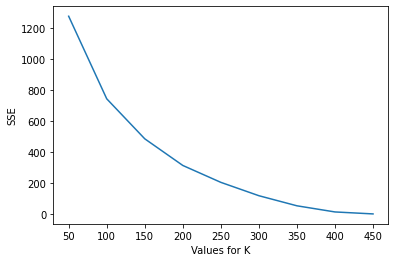

In [ ]:
sse = {}
for k in np.arange(50,500,50):
  kmeans = KMeans(n_clusters=k, max_iter=400).fit(X_cv)
  sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [ ]:
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_cv)
result = pd.concat([item_desc3, pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())], axis=1)
result['cluster'] = kmeans.predict(X_cv)

result[[0,'cluster']]

,0,cluster
0,clean hole o,73
1,cyclon preheat clean hole o,13
2,cyclon preheat clean hole o,13
3,clean hole preheat distribut box raw feed dist...,29
4,clean hole preheat distribut box raw feed dist...,29
...,...,...
1225,bin limeston,91
1226,bin gypsum,19
1227,bin pozzolan,19
1228,coal meal bin id,50


In [ ]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
  subset = result[result['cluster'] == clusters[i]]
  words = ' '.join([x for x in np.where(subset.all()!=0, subset.columns, None) if x and x != 'Name' and x != 'cluster' and len(x.split()) == 1])
  labels.append(words)

labels_table = pd.DataFrame(zip(clusters, labels), columns = ['cluster', 'label'])
result_labelled = pd.merge(result, labels_table, on = 'cluster', how = 'left')

result_labelled = result_labelled.rename(columns={0: 'item_description'})

In [ ]:
result_labelled[['item_description', 'cluster', 'label']]

,item_description,cluster,label
0,clean hole o,73,clean hole
1,cyclon preheat clean hole o,13,clean cyclon preheat
2,cyclon preheat clean hole o,13,clean cyclon preheat
3,clean hole preheat distribut box raw feed dist...,29,box clean distribut feed hole preheat raw stag...
4,clean hole preheat distribut box raw feed dist...,29,box clean distribut feed hole preheat raw stag...
...,...,...,...
1225,bin limeston,91,bin limeston
1226,bin gypsum,19,
1227,bin pozzolan,19,
1228,coal meal bin id,50,coal id


In [ ]:
pd.pivot_table(result_labelled, index=['label'], values=['item_description'], aggfunc='count').sort_values(['item_description'], ascending=False)

,item_description
label,
duct,155
,153
plate,68
detail duct,67
stack steel,54
...,...
condit exhaust fan ga id,2
clinker cooler fan,2
dhrv fan filter main nkrd oeld stator venti,2


In [ ]:
df["cluster"] = result_labelled["label"]
df

,eqp1,eqp2,no req,wbs,item desc,qty,net weight,man hour,cluster
0,421,kr405,443199,p4-1302-421-da-m,clean out hole o,8,"80,0","57,0",clean hole
1,421,cn220,443727,p4-1302-421-da-m,cyclone preheater clean out hole o,1,"13,0","17,9",clean cyclon preheat
2,421,cn220,443727,p4-1302-421-da-m,cyclone preheater clean out hole o,1,"13,0","17,9",clean cyclon preheat
3,421,cn110,443727,p4-1302-421-da-m,clean out hole for preheater distribution box ...,1,"13,0","19,2",box clean distribut feed hole preheat raw stag...
4,421,cn210,443727,p4-1302-421-da-m,clean out hole for preheater distribution box ...,1,"13,0","19,2",box clean distribut feed hole preheat raw stag...
...,...,...,...,...,...,...,...,...,...
1225,511,bi200,460653,p4-1302-541-ea-m,bin limestone,1,"12.217,0","2.440,2",bin limeston
1226,511,bi300,460667,p4-1302-541-ea-m,bin gypsum,1,"14.098,0","2.561,7",
1227,511,bi400,460669,p4-1302-541-ea-m,bin pozzolan,1,"17.943,4","1.919,6",
1228,465,bi550,458425,p4-1302-461-di-m,coal meal bin id,1,"29.408,3","4.210,9",coal id


In [ ]:
df_c = df.groupby(["cluster"])
df_w = df.groupby(["wbs"])

In [ ]:
df2 = [x for _, x in df.groupby(df['wbs'])]
df2

[     eqp1 eqp2 no req wbs  ... qty  net weight     man hour    cluster
 1193    -  NaN      -   -  ...   1    58.687,8    24.707,4   accessori
 1196    -  NaN      -   -  ...   1   445.446,3     4.635,8   accessori
 
 [2 rows x 9 columns],
      eqp1   eqp2  no req  ... net weight  man hour      cluster
 102   245  xa910  472229  ...      162,0     27,0              
 367   245  bi100  465695  ...    1.591,0     92,0   ash bin fli
 368   245  bi100  465695  ...    4.276,0    418,2   ash bin fli
 369   245  bi100  465695  ...    1.333,0    115,5   ash bin fli
 370   245  bi100  465695  ...    2.365,0     77,0   ash bin fli
 371   245  bi100  465695  ...      825,0     77,0   ash bin fli
 372   245  bi100  465695  ...      710,0     60,0   ash bin fli
 373   245  bi100  465695  ...      594,0     55,0   ash bin fli
 374   245  bi100  465695  ...      510,0     42,7   ash bin fli
 375   245  bi100  465695  ...      160,0     26,7   ash bin fli
 1223  245  bi100  465695  ...   12.364,0   

In [ ]:
df3 = [x for _, x in df.groupby(df['cluster'])]
df3

[     eqp1   eqp2  no req               wbs  ... qty  net weight    man hour cluster
 5     421  du415  463604  p4-1302-421-dc-m  ...   2       596,0      112,9         
 6     351  kf200  446234  p4-1302-361-cg-m  ...   1     2.470,6      451,8         
 7     421  xa440  449774  p4-1302-421-da-m  ...   2     1.071,4      197,6         
 10    431  xa115  440885  p4-1302-431-dd-m  ...   3    10.023,0      592,1         
 35    331  ct200  445986  p4-1302-341-cd-m  ...   1       962,0       77,8         
 ...   ...    ...     ...               ...  ...  ..          ...        ...     ...
 1162  431  is170     NaN               NaN  ...   1       138,0       23,0         
 1213  311  bi200  451615  p4-1302-331-ca-m  ...   1    19.942,7    1.661,9         
 1224  511  bi100  460599  p4-1302-541-ea-m  ...   1    28.129,6    2.876,4         
 1226  511  bi300  460667  p4-1302-541-ea-m  ...   1    14.098,0    2.561,7         
 1227  511  bi400  460669  p4-1302-541-ea-m  ...   1    17.943,4 

In [ ]:
df.to_excel('indarung_pol.xlsx')